# Setup

In [ ]:
# Import libraries
import os
import warnings
warnings.filterwarnings("ignore")

# Set up environment variables
project_id='hst-953-2019' # add your bigquery project_id
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
np.random.seed(2020)

import pandas as pd
pd.set_option('mode.chained_assignment', None)

# authenticate
auth.authenticate_user()

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

import pickle

In [ ]:
client = bigquery.Client(project=project_id)




query_framework= client.query("""
""").to_dataframe()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
base_dir = "/content/gdrive/My Drive/" #Aldo

Mounted at /content/gdrive


#**A) Inclusion**
- 

In [ ]:
%%bigquery gi_bleed
WITH t1 AS(
SELECT * FROM `physionet-data.mimic_hosp.d_icd_diagnoses` 
WHERE 
# ICD 9
icd_code LIKE "53110" --Acute gastric ulcer with perforation, without mention of obstruction
OR icd_code LIKE "53120"-- Acute gastric ulcer with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "53140" -- Chronic or unspecified gastric ulcer with hemorrhage, without mention of obstruction
OR icd_code LIKE "53160" -- Chronic or unspecified gastric ulcer with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "53200"-- Acute duodenal ulcer with hemorrhage, without mention of obstruction
OR icd_code LIKE "53220"-- Acute duodenal ulcer with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "53240"-- Chronic or unspecified duodenal ulcer with hemorrhage, without mention of obstruction
OR icd_code LIKE "53260"-- Chronic or unspecified duodenal ulcer with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "53300" -- Acute peptic ulcer of unspecified site with hemorrhage, without mention of obstruction
OR icd_code LIKE "53320" -- Acute peptic ulcer of unspecified site with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "53340" -- Chronic or unspecified peptic ulcer of unspecified site with hemorrhage, without mention of obstruction
OR icd_code LIKE "53360" -- Chronic or unspecified peptic ulcer of unspecified site with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "53400"-- Acute gastrojejunal ulcer with hemorrhage, without mention of obstruction
OR icd_code LIKE "53420" -- Acute gastrojejunal ulcer with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "53440" -- Chronic or unspecified gastrojejunal ulcer with hemorrhage, without mention of obstruction
OR icd_code LIKE "53460" -- Chronic or unspecified gastrojejunal ulcer with hemorrhage and perforation, without mention of obstruction
OR icd_code LIKE "5780%" -- Hematemesis
OR icd_code LIKE "5781%" -- Blood in stool
OR icd_code LIKE "5789%" --Hemorrhage of gastrointestinal tract, unspecified
OR icd_code LIKE  "45620" -- Esophageal varices in diseases classified elsewhere, with bleeding

-- ICD 1O 
OR icd_code LIKE "K920%" -- Hematemesis
OR icd_code LIKE "K921"--Melena
OR icd_code LIKE "I8501%" -- Esophageal varices with bleeding
-- I98.20 (oesophageal varices in diseases classified elsewhere with bleeding) Not present in icd10 but is in icd9 ,
-- Not Found: I98.3 (Oesophageal varices with bleeding in disease classified elsewhere)
OR icd_code LIKE "K2211%" --Ulcer of esophagus with bleeding /K22.10 (Ulcer of oesophagus, acute with bleeding)
-- Not Found K22.12 (Ulcer of oesophagus, acute with both bleeding and perforation)
-- Not Found K22.14 (Ulcer of oesophagus, chronic or unspecified with bleeding), 
-- Not Found K22.16 (Ulcer of oesophagus, chronic or unspecified with both bleeding and perforation)
OR icd_code LIKE "K250" -- Acute gastric ulcer with hemorrhage / K25.0 (Gastric ulcer, acute with bleeding), 
OR icd_code LIKE "K252" --Acute gastric ulcer with both hemorrhage and perforation /K25.2 (Gastric ulcer, acute with both bleeding and perforation),
OR icd_code LIKE "K254" -- Chronic or unspecified gastric ulcer with hemorrhage /K25.4 (Gastric ulcer, chronic or unspecified with bleeding), 
OR icd_code LIKE "K256" -- Chronic or unspecified gastric ulcer with both hemorrhage and perforation/K25.6 (Gastric ulcer, chronic or unspecified with both bleeding and perforation), 
OR icd_code LIKE "K260"  --Acute duodenal ulcer with hemorrhage/ K26.0 (Duodenal ulcer, acute with bleeding), K26.2 (Duodenal ulcer, acute with both bleeding and perforation),

OR icd_code LIKE "K264"--Chronic or unspecified duodenal ulcer with hemorrhage/K26.4 (Duodenal ulcer, chronic or unspecified with bleeding), 
OR icd_code LIKE "K266"--Chronic or unspecified duodenal ulcer with both hemorrhage and perforation/K26.6 (Duodenal ulcer, chronic or unspecified with both bleeding and perforation), 
OR icd_code LIKE "K270"-- Acute peptic ulcer, site unspecified, with hemorrhage/K27.0 (Peptic ulcer, acute with bleeding), 

OR icd_code LIKE "K272" --Acute peptic ulcer, site unspecified, with both hemorrhage and perforation /K27.2 (Peptic ulcer, acute with both bleeding and perforation),

OR icd_code LIKE "K274"--Chronic or unspecified peptic ulcer, site unspecified, with hemorrhage/K27.4 (Peptic ulcer, chronic or unspecified with bleeding), 
OR icd_code LIKE "K276"--Chronic or unspecified peptic ulcer, site unspecified, with both hemorrhage and perforation/K27.6 (Peptic ulcer, chronic or unspecified with both bleeding and perforation), 
OR icd_code LIKE "K280"--Acute gastrojejunal ulcer with hemorrhage/K28.0 (Gastrojejunal ulcer, acute with bleeding), 
OR icd_code LIKE "K282"--Acute gastrojejunal ulcer with both hemorrhage and perforation/K28.2 (Gastrojejunal ulcer, acute with both bleeding and perforation),
OR icd_code LIKE "K284"--Chronic or unspecified gastrojejunal ulcer with hemorrhage/K28.4 (Gastrojejunal ulcer, chronic or unspecified with bleeding), 
OR icd_code LIKE "K286"--Chronic or unspecified gastrojejunal ulcer with both hemorrhage and perforation/K28.6 (Gastrojejunal ulcer, chronic or unspecified with both bleeding and perforation), 

OR icd_code LIKE "K2901" --Acute gastritis with bleeding /K29.0 (Acute bleeding gastritis), ---
--Not Found but there are variations K63.80 (Angiodysplasia of small intestine, except duodenum with bleeding),
OR icd_code LIKE "K31811" --Angiodysplasia of stomach and duodenum with bleeding/ K31.80 (Angiodysplasia of stomach and duodenum with bleeding) 
)
SELECT * FROM t1
INNER JOIN `physionet-data.mimic_hosp.diagnoses_icd` t2
ON t1.icd_code= t2.icd_code
INNER JOIN `physionet-data.mimic_derived.icustay_detail` t3
ON t2.hadm_id=t3.hadm_id

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
gi_bleed.head()

,icd_code,icd_version,long_title,subject_id,hadm_id,seq_num,icd_code_1,icd_version_1,subject_id_1,hadm_id_1,...,admission_age,ethnicity,hospital_expire_flag,hospstay_seq,first_hosp_stay,icu_intime,icu_outtime,los_icu,icustay_seq,first_icu_stay
0,5780,9,Hematemesis,12602610,27824372,30,5780,9,12602610,27824372,...,46,HISPANIC/LATINO,1,2,False,2130-11-21 13:06:19,2130-11-25 03:23:44,3.58,2,False
1,5780,9,Hematemesis,12602610,27824372,30,5780,9,12602610,27824372,...,46,HISPANIC/LATINO,1,2,False,2130-11-13 20:54:00,2130-11-19 19:32:32,5.96,1,True
2,5789,9,"Hemorrhage of gastrointestinal tract, unspecified",17311271,23348535,28,5789,9,17311271,23348535,...,48,UNKNOWN,0,1,True,2188-08-30 23:58:55,2188-09-01 19:18:29,1.83,3,False
3,5789,9,"Hemorrhage of gastrointestinal tract, unspecified",17311271,23348535,28,5789,9,17311271,23348535,...,48,UNKNOWN,0,1,True,2188-07-21 20:39:30,2188-07-28 21:53:58,7.04,1,True
4,5789,9,"Hemorrhage of gastrointestinal tract, unspecified",17311271,23348535,28,5789,9,17311271,23348535,...,48,UNKNOWN,0,1,True,2188-08-10 15:26:11,2188-08-14 14:47:48,3.96,2,False


In [ ]:
gi_bleed['stay_id'].nunique()

5185

In [ ]:
print(f'GI Bleeding patients: {gi_bleed.shape[0]}')

GI Bleeding patients: 10533


# **B) Features**

## Sepsis patients

In [ ]:
%%bigquery sepsis
WITH sofa AS
(
  SELECT stay_id
    , starttime, endtime
    , respiration_24hours as respiration
    , coagulation_24hours as coagulation
    , liver_24hours as liver
    , cardiovascular_24hours as cardiovascular
    , cns_24hours as cns
    , renal_24hours as renal
    , sofa_24hours as sofa_score
  FROM `physionet-data.mimic_derived.sofa`
  WHERE sofa_24hours >= 2
)
, s1 as
(
  SELECT 
    soi.subject_id
    , soi.stay_id
    -- suspicion columns
    , soi.ab_id
    , soi.antibiotic
    , soi.antibiotic_time
    , soi.culture_time
    , soi.suspected_infection
    , soi.suspected_infection_time
    , soi.specimen
    , soi.positive_culture
    -- sofa columns
    , starttime, endtime
    , respiration, coagulation, liver, cardiovascular, cns, renal
    , sofa_score
    -- All rows have an associated suspicion of infection event
    -- Therefore, Sepsis-3 is defined as SOFA >= 2.
    -- Implicitly, the baseline SOFA score is assumed to be zero, as we do not know
    -- if the patient has preexisting (acute or chronic) organ dysfunction 
    -- before the onset of infection.
    , sofa_score >= 2 and suspected_infection = 1 as sepsis3
    -- subselect to the earliest suspicion/antibiotic/SOFA row
    , ROW_NUMBER() OVER
    (
        PARTITION BY soi.stay_id
        ORDER BY suspected_infection_time, antibiotic_time, culture_time, endtime
    ) AS rn_sus
  FROM `physionet-data.mimic_derived.suspicion_of_infection` as soi
  INNER JOIN sofa
    ON soi.stay_id = sofa.stay_id 
    AND sofa.endtime >= DATETIME_SUB(soi.suspected_infection_time, INTERVAL 48 HOUR)
    AND sofa.endtime <= DATETIME_ADD(soi.suspected_infection_time, INTERVAL 24 HOUR)
  -- only include in-ICU rows
  WHERE soi.stay_id is not null
)
SELECT 
subject_id, stay_id
-- note: there may be more than one antibiotic given at this time
, antibiotic_time
-- culture times may be dates, rather than times
, culture_time
, suspected_infection_time
-- endtime is latest time at which the SOFA score is valid
, endtime as sofa_time
, sofa_score
, respiration, coagulation, liver, cardiovascular, cns, renal
, sepsis3
FROM s1
WHERE rn_sus = 1

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
sepsis.columns

Index(['subject_id', 'stay_id', 'antibiotic_time', 'culture_time',
       'suspected_infection_time', 'sofa_time', 'sofa_score', 'respiration',
       'coagulation', 'liver', 'cardiovascular', 'cns', 'renal', 'sepsis3'],
      dtype='object')

In [ ]:
# Exclude GI Bleeding 
print(f'Total septic patients {sepsis.shape[0]}')
sepsis = sepsis[~sepsis['stay_id'].isin(gi_bleed['stay_id'])]
print(f'Septic patients without GI Bleeding diagnosis {sepsis.shape[0]}')

Total septic patients 34789
Septic patients without GI Bleeding diagnosis 32079


## Transfusion events

In [ ]:
%%bigquery transfusion
SELECT
ipe.stay_id,
ipe.starttime AS charttime,
Round(ipe.amount) AS amount,
-- items.unitname,
CASE WHEN ipe.itemid in (225168,220996) THEN "Packed Red Blood Cells" ELSE NULL END AS Blood_Product_Category
--items.category,
--items.linksto
, ipe.itemid
FROM `physionet-data.mimic_icu.inputevents` ipe
-- INNER JOIN `physionet-data.mimic_icu.d_items` items
-- on ipe.itemid=items.itemid
WHERE ipe.itemid IN(
            225168,	--Packed Red Blood Cells
            220996 -- Packed Red Cells
            )
AND ipe.statusdescription != 'Rewritten'
ORDER BY stay_id

Query is running:   0%|          |

Downloading:   0%|          |

### Transfused patients

In [ ]:
df_merge_1 = transfusion.merge(sepsis['stay_id'], how = 'inner', left_on = 'stay_id', right_on = 'stay_id')
df_merge_1.head()

,stay_id,charttime,amount,Blood_Product_Category,itemid
0,30000484,2136-01-15 10:38:00,9.0,Packed Red Blood Cells,225168
1,30000484,2136-01-15 10:40:00,264.0,Packed Red Blood Cells,225168
2,30001446,2186-04-12 04:28:00,375.0,Packed Red Blood Cells,225168
3,30001555,2177-09-27 16:00:00,350.0,Packed Red Blood Cells,225168
4,30003598,2189-04-15 21:26:00,275.0,Packed Red Blood Cells,225168


In [ ]:
print(f'ICU stays related with Sepsis and transfused at least once: {df_merge_1["stay_id"].nunique()}')
print(f'Total transfusion events for sepsis ICU patients: {df_merge_1.shape[0]}')

ICU stays related with Sepsis and transfused at least once: 9289
Total transfusion events for sepsis ICU patients: 32150


### Control group

In [ ]:
# Control group, patients that did not received blood transfusion
df_not_tx = sepsis[~sepsis['stay_id'].isin(df_merge_1['stay_id'])]

df_not_tx.head(3)

,subject_id,stay_id,antibiotic_time,culture_time,suspected_infection_time,sofa_time,sofa_score,respiration,coagulation,liver,cardiovascular,cns,renal,sepsis3
3,19959499,30385282,2174-08-13 17:00:00,2174-08-12 19:05:00,2174-08-12 19:05:00,2174-08-13 17:00:00,12,3,1,0,3,4,1,True
6,13184298,30099685,2127-02-15 18:00:00,2127-02-15 17:19:00,2127-02-15 17:19:00,2127-02-15 18:00:00,12,0,2,2,4,0,4,True
10,17284612,35687873,2140-10-29 18:00:00,2140-10-28 08:00:00,2140-10-28 08:00:00,2140-10-26 08:00:00,12,3,1,0,4,4,0,True


In [ ]:
print(f'Septic patients that were not transfused: {df_not_tx.shape[0]}')
print(f'Total of septic patients: {sepsis.shape[0]}')
print(f'Sanity check: {df_merge_1["stay_id"].nunique() + df_not_tx.shape[0]}')

Septic patients that were not transfused: 22790
Total of septic patients: 32079
Sanity check: 32079


## Hemoglobin

In [ ]:
%%bigquery hgb
WITH cbc AS(
    SELECT 
    ie.stay_id, ie.intime as icu_intime,   
    cbc.charttime as hgb_charttime
    , cbc.hemoglobin
        FROM `physionet-data.mimic_icu.icustays` ie
        LEFT JOIN `physionet-data.mimic_derived.complete_blood_count` cbc
        ON cbc.subject_id = ie.subject_id
        WHERE hemoglobin IS NOT null
),
bg AS(
    SELECT
    ie.stay_id, ie.intime as icu_intime,
    bg.charttime as hgb_charttime,
    bg.hemoglobin
    FROM `physionet-data.mimic_icu.icustays` ie
    LEFT JOIN `physionet-data.mimic_derived.bg` bg
    ON ie.subject_id = bg.subject_id
    WHERE hemoglobin IS NOT null
)
SELECT * FROM cbc
UNION ALL
SELECT * FROM bg
ORDER BY stay_id, hgb_charttime

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
hgb.head()

,stay_id,icu_intime,hgb_charttime,hemoglobin
0,30000153,2174-09-29 12:09:00,2174-09-29 10:16:00,13.0
1,30000153,2174-09-29 12:09:00,2174-09-29 13:27:00,12.5
2,30000153,2174-09-29 12:09:00,2174-09-29 14:07:00,10.9
3,30000153,2174-09-29 12:09:00,2174-09-29 15:37:00,10.8
4,30000153,2174-09-29 12:09:00,2174-09-30 03:34:00,9.8


In [ ]:
hgb = hgb[(hgb['hemoglobin'] >= 1) & (hgb['hemoglobin'] < 25)]

In [ ]:
print(f'Hgb total records: {hgb.shape[0]}')
print(f'Total ICU stays with Hgb readings: {hgb["stay_id"].nunique()}')

Hgb total records: 4164948
Total ICU stays with Hgb readings: 76478


In [ ]:
# LOWEST Hgb for not transfused patients

df_not_tx_lhgb = hgb.merge(df_not_tx['stay_id'], how = 'inner', left_on = 'stay_id', right_on = 'stay_id')
df_not_tx_lhgb.sort_values(['stay_id','hemoglobin'], inplace = True, ignore_index = True)
# Exclude Hgb below 1 g/dL
df_not_tx_lhgb = df_not_tx_lhgb[(df_not_tx_lhgb['hemoglobin'] >= 1)&(df_not_tx_lhgb['hemoglobin'] < 25)]
df_not_tx_lhgb.head()

,stay_id,icu_intime,hgb_charttime,hemoglobin
0,30000646,2194-04-29 01:39:22,2194-05-06 06:45:00,11.3
1,30000646,2194-04-29 01:39:22,2194-05-05 08:33:00,12.1
2,30000646,2194-04-29 01:39:22,2194-05-04 07:15:00,12.6
3,30000646,2194-04-29 01:39:22,2193-12-31 07:55:00,12.7
4,30000646,2194-04-29 01:39:22,2194-04-29 02:33:00,12.9


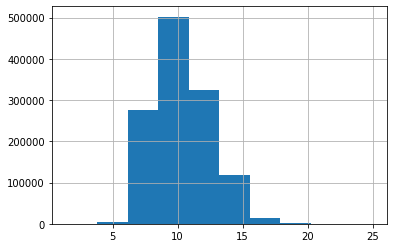

In [ ]:
df_not_tx_lhgb['hemoglobin'].hist()

In [ ]:
df_hgb_control = pd.DataFrame(df_not_tx_lhgb[['stay_id', 'hemoglobin']].groupby('stay_id').min())
df_hgb_control

,hemoglobin
stay_id,
30000646,11.3
30002415,10.1
30002654,7.3
30002925,9.4
30003226,4.2
...,...
39993683,7.6
39993968,12.5
39997370,4.6


In [ ]:
print(f'Patients with hemoglobin readings and were not transfused {df_not_tx_lhgb["stay_id"].shape[0]}')

Patients with hemoglobin readings and were not transfused 1239845


## Pairing tx - hgb
Only for patients that received pRBC units

In [ ]:
icu_stay_ids = list(df_merge_1['stay_id'].unique())

tx_hgb = []

for id in tqdm(icu_stay_ids):
  df_icustay = df_merge_1[df_merge_1['stay_id'] == id]
  df_hgb_icustay = hgb[hgb['stay_id'] == id]

  lst_hgb_time = df_hgb_icustay['hgb_charttime'].to_list()

  df_merge_cx = df_icustay.merge(df_hgb_icustay, how = 'cross')
  df_merge_cx['timed'] = df_merge_cx['charttime'] - df_merge_cx['hgb_charttime']
  df_merge_p = df_merge_cx[df_merge_cx['timed'] > pd.Timedelta(0)].copy()
  df_target = df_merge_p[df_merge_p['timed'] == df_merge_p['timed'].min()]

  tx_hgb.append(df_target)

  0%|          | 0/9289 [00:00<?, ?it/s]

In [ ]:
tx_hgb = pd.concat(tx_hgb)
print(tx_hgb.head(3))

    stay_id_x           charttime  amount  Blood_Product_Category  itemid  \
51   30000484 2136-01-15 10:38:00     9.0  Packed Red Blood Cells  225168   
12   30001446 2186-04-12 04:28:00   375.0  Packed Red Blood Cells  225168   
68   30001555 2177-09-27 16:00:00   350.0  Packed Red Blood Cells  225168   

    stay_id_y          icu_intime       hgb_charttime  hemoglobin  \
51   30000484 2136-01-14 17:23:32 2136-01-15 04:28:00         8.1   
12   30001446 2186-04-12 03:49:00 2186-04-12 02:00:00         7.9   
68   30001555 2177-09-27 11:23:13 2177-09-27 11:50:00         7.6   

             timed  
51 0 days 06:10:00  
12 0 days 02:28:00  
68 0 days 04:10:00  


In [ ]:
tx_hgb[['stay_id_x', 'charttime', 'amount', 'itemid', 'icu_intime', 'hgb_charttime', 'hemoglobin', 'timed']].to_pickle(base_dir+'tx_hgb.pkl')

tx_hgb[['stay_id_x', 'charttime', 'amount', 'itemid', 'icu_intime', 'hgb_charttime', 'hemoglobin', 'timed']].head(3)

,stay_id_x,charttime,amount,itemid,icu_intime,hgb_charttime,hemoglobin,timed
51,30000484,2136-01-15 10:38:00,9.0,225168,2136-01-14 17:23:32,2136-01-15 04:28:00,8.1,0 days 06:10:00
12,30001446,2186-04-12 04:28:00,375.0,225168,2186-04-12 03:49:00,2186-04-12 02:00:00,7.9,0 days 02:28:00
68,30001555,2177-09-27 16:00:00,350.0,225168,2177-09-27 11:23:13,2177-09-27 11:50:00,7.6,0 days 04:10:00


In [ ]:
print(f'Total pairs of Hg and blood transfusion events: {tx_hgb.shape[0]}')

Total pairs of Hg and blood transfusion events: 9386


## Demographics

In [ ]:
%%bigquery demo
SELECT
subject_id, hadm_id, stay_id, admission_age, gender, ethnicity
FROM `physionet-data.mimic_derived.icustay_detail`

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
tx_hgb[['stay_id_x', 'charttime', 'amount', 'itemid', 'icu_intime', 'hgb_charttime', 'hemoglobin', 'timed']].head(3)

,stay_id_x,charttime,amount,itemid,icu_intime,hgb_charttime,hemoglobin,timed
51,30000484,2136-01-15 10:38:00,9.0,225168,2136-01-14 17:23:32,2136-01-15 04:28:00,8.1,0 days 06:10:00
12,30001446,2186-04-12 04:28:00,375.0,225168,2186-04-12 03:49:00,2186-04-12 02:00:00,7.9,0 days 02:28:00
68,30001555,2177-09-27 16:00:00,350.0,225168,2177-09-27 11:23:13,2177-09-27 11:50:00,7.6,0 days 04:10:00


### Merging por sepsis patients

In [ ]:
df_merge_2 = tx_hgb[['stay_id_x', 'charttime', 'amount', 'itemid', 'icu_intime', 'hgb_charttime', 'hemoglobin', 'timed']].merge(demo, how='inner', left_on='stay_id_x', right_on ='stay_id')
df_merge_2

,stay_id_x,charttime,amount,itemid,icu_intime,hgb_charttime,hemoglobin,timed,subject_id,hadm_id,stay_id,admission_age,gender,ethnicity
0,30000484,2136-01-15 10:38:00,9.0,225168,2136-01-14 17:23:32,2136-01-15 04:28:00,8.1,0 days 06:10:00,18421337,22413411,30000484,92,M,OTHER
1,30001446,2186-04-12 04:28:00,375.0,225168,2186-04-12 03:49:00,2186-04-12 02:00:00,7.9,0 days 02:28:00,16513856,24463832,30001446,56,M,WHITE
2,30001555,2177-09-27 16:00:00,350.0,225168,2177-09-27 11:23:13,2177-09-27 11:50:00,7.6,0 days 04:10:00,10656173,25778760,30001555,34,F,WHITE
3,30003598,2189-04-15 21:26:00,275.0,225168,2189-04-14 20:27:25,2189-04-15 02:46:00,9.6,0 days 18:40:00,15332791,20683754,30003598,64,F,WHITE
4,30003749,2120-11-06 22:41:00,350.0,225168,2120-11-05 16:03:00,2120-11-06 21:45:00,7.0,0 days 00:56:00,12227720,29396704,30003749,50,M,WHITE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9381,39995213,2127-12-14 04:56:00,350.0,225168,2127-12-11 18:03:43,2127-12-14 03:48:00,6.9,0 days 01:08:00,13534199,23907399,39995213,45,F,UNKNOWN
9382,39995735,2124-08-15 18:33:00,375.0,225168,2124-08-15 10:59:52,2124-08-15 18:00:00,11.0,0 days 00:33:00,11539827,21192405,39995735,62,M,WHITE
9383,39995735,2124-08-15 18:33:00,375.0,225168,2124-08-15 10:59:52,2124-08-15 18:00:00,11.0,0 days 00:33:00,11539827,21192405,39995735,62,M,WHITE
9384,39996044,2164-12-11 11:45:00,46.0,225168,2164-12-10 17:50:47,2164-12-11 07:58:00,5.7,0 days 03:47:00,15952397,24449420,39996044,58,M,WHITE


In [ ]:
df_final = df_merge_2[['subject_id','hadm_id','stay_id', 'icu_intime', 'admission_age', 'gender', 'ethnicity', 'charttime', 'amount', 'hgb_charttime', 'hemoglobin']]
df_final.sort_values(['stay_id','hgb_charttime'], inplace = True, ignore_index = True)
df_final.head(3)

,subject_id,hadm_id,stay_id,icu_intime,admission_age,gender,ethnicity,charttime,amount,hgb_charttime,hemoglobin
0,18421337,22413411,30000484,2136-01-14 17:23:32,92,M,OTHER,2136-01-15 10:38:00,9.0,2136-01-15 04:28:00,8.1
1,16513856,24463832,30001446,2186-04-12 03:49:00,56,M,WHITE,2186-04-12 04:28:00,375.0,2186-04-12 02:00:00,7.9
2,10656173,25778760,30001555,2177-09-27 11:23:13,34,F,WHITE,2177-09-27 16:00:00,350.0,2177-09-27 11:50:00,7.6


In [ ]:
## Get pRBC units, 1 unit = 365 mL
df_final['blood_units'] = df_final['amount']/365
df_final.head(3)

,subject_id,hadm_id,stay_id,icu_intime,admission_age,gender,ethnicity,charttime,amount,hgb_charttime,hemoglobin,blood_units
0,18421337,22413411,30000484,2136-01-14 17:23:32,92,M,OTHER,2136-01-15 10:38:00,9.0,2136-01-15 04:28:00,8.1,0.024658
1,16513856,24463832,30001446,2186-04-12 03:49:00,56,M,WHITE,2186-04-12 04:28:00,375.0,2186-04-12 02:00:00,7.9,1.027397
2,10656173,25778760,30001555,2177-09-27 11:23:13,34,F,WHITE,2177-09-27 16:00:00,350.0,2177-09-27 11:50:00,7.6,0.958904


In [ ]:
df_final.to_pickle(base_dir+'tx_hgb.pkl')

### Merge with control group

In [ ]:
df_final_control = df_hgb_control.merge(demo, how='inner', left_on='stay_id', right_on ='stay_id')
df_final_control.head()

,stay_id,hemoglobin,subject_id,hadm_id,admission_age,gender,ethnicity
0,30000646,11.3,12207593,22795209,44,M,ASIAN
1,30002415,10.1,17921898,28841024,72,F,WHITE
2,30002654,7.3,15978672,26652960,68,M,WHITE
3,30002925,9.4,10208468,25796414,87,M,WHITE
4,30003226,4.2,11423795,20012928,67,M,BLACK/AFRICAN AMERICAN


# Data analysis

### Sepsis patients

In [ ]:
df_final['ethnicity'].unique()

array(['OTHER', 'WHITE', 'ASIAN', 'UNKNOWN', 'UNABLE TO OBTAIN',
       'BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO',
       'AMERICAN INDIAN/ALASKA NATIVE'], dtype=object)

### Control group